#### Import Data and Required Packages


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame


In [3]:
df = pd.read_csv('data\Online_fraud.csv')

#### Show Top 5 Records

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### Shape of the dataset

In [5]:
df.shape

(567, 11)

#### Checking Missing values

In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

* There are no missing values in the data set

#### Checking Duplicates

In [7]:
df.duplicated().sum()

0

* There are no duplicates values in the dataset

#### Checking data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            567 non-null    int64  
 1   type            567 non-null    object 
 2   amount          567 non-null    float64
 3   nameOrig        567 non-null    object 
 4   oldbalanceOrg   567 non-null    float64
 5   newbalanceOrig  567 non-null    float64
 6   nameDest        567 non-null    object 
 7   oldbalanceDest  567 non-null    float64
 8   newbalanceDest  567 non-null    float64
 9   isFraud         567 non-null    int64  
 10  isFlaggedFraud  567 non-null    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 48.9+ KB


#### Checking the number of unique values in each column

In [9]:
df.nunique()

step                1
type                5
amount            565
nameOrig          567
oldbalanceOrg     391
newbalanceOrig    313
nameDest          356
oldbalanceDest    326
newbalanceDest     83
isFraud             2
isFlaggedFraud      1
dtype: int64

#### Checking statistics of data set

In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,567.0,5.670000e+02,5.670000e+02,5.670000e+02,5.670000e+02,5.670000e+02,567.000000,567.0
mean,1.0,1.309317e+05,9.216381e+05,9.483912e+05,5.669400e+05,1.149753e+06,0.007055,0.0
std,0.0,2.782900e+05,2.115473e+06,2.165332e+06,1.765894e+06,3.543112e+06,0.083769,0.0
min,1.0,8.730000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.0,4.353820e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,1.0,1.442066e+04,1.264210e+04,4.321030e+03,4.485300e+04,0.000000e+00,0.000000,0.0
75%,1.0,1.534818e+05,1.285164e+05,1.240390e+05,4.033705e+05,3.535326e+05,0.000000,0.0
max,1.0,2.545478e+06,8.623151e+06,8.674805e+06,1.700000e+07,1.920000e+07,1.000000,0.0


#### Exploring Data

In [11]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
print("Categories in 'type' variable:     ",end=" " )
print(df['type'].unique())

print("Categories in 'nameOrig' variable:  ",end=" ")
print(df['nameOrig'].unique())

print("Categories in'nameDest' variable:",end=" " )
print(df['nameDest'].unique())

Categories in 'type' variable:      ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Categories in 'nameOrig' variable:   ['C1231006815' 'C1666544295' 'C1305486145' 'C840083671' 'C2048537720'
 'C90045638' 'C154988899' 'C1912850431' 'C1265012928' 'C712410124'
 'C1900366749' 'C249177573' 'C1648232591' 'C1716932897' 'C1026483832'
 'C905080434' 'C761750706' 'C1237762639' 'C2033524545' 'C1670993182'
 'C20804602' 'C1566511282' 'C1959239586' 'C504336483' 'C1984094095'
 'C1043358826' 'C1671590089' 'C1053967012' 'C1632497828' 'C764826684'
 'C2103763750' 'C215078753' 'C840514538' 'C1768242710' 'C247113419'
 'C1238616099' 'C1608633989' 'C923341586' 'C1470868839' 'C711197015'
 'C1481594086' 'C1466917878' 'C768216420' 'C260084831' 'C598357562'
 'C1440738283' 'C484199463' 'C1570470538' 'C512549200' 'C1615801298'
 'C460570271' 'C2072313080' 'C816944408' 'C912966811' 'C1458621573'
 'C46941357' 'C343345308' 'C104716441' 'C1976401987' 'C867288517'
 'C1528834618' 'C280615803' 'C166694583' 'C885910946'

In [13]:
# Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

We have 3 categorical features : ['type', 'nameOrig', 'nameDest']


#### Data Visualization

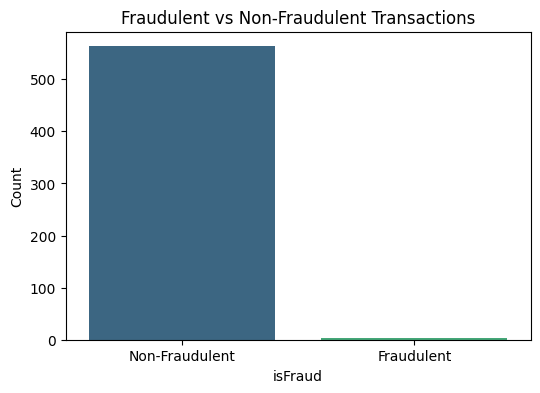

In [15]:
#Target Variable Analysis
fraud_counts = df['isFraud'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="viridis")
plt.title("Fraudulent vs Non-Fraudulent Transactions")
plt.xticks([0, 1], ["Non-Fraudulent", "Fraudulent"])
plt.ylabel("Count")
plt.show()

##### Insights

* Most of the transactions are non-fraudlent, while only a few are fraudlent.

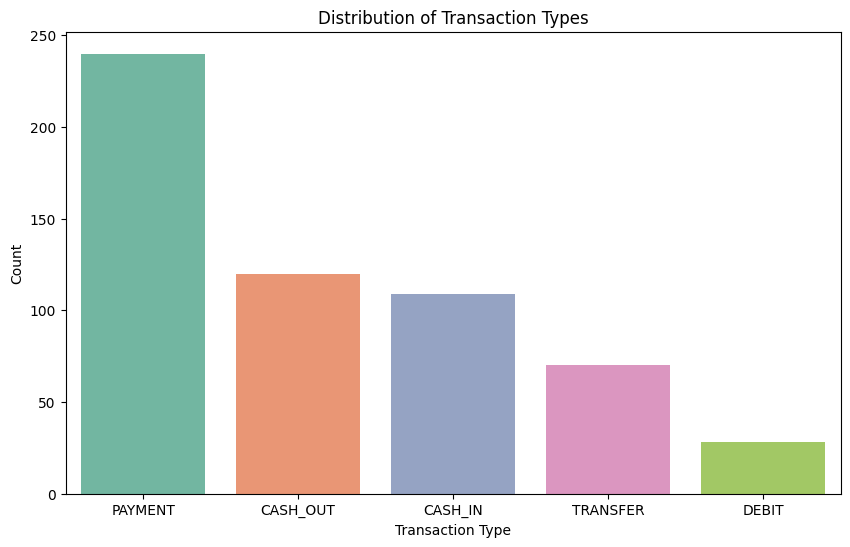

In [17]:
#Transaction Type Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette="Set2")
plt.title("Distribution of Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

##### Insights

* Payment is the most common transaction type, while Debit is the least common.

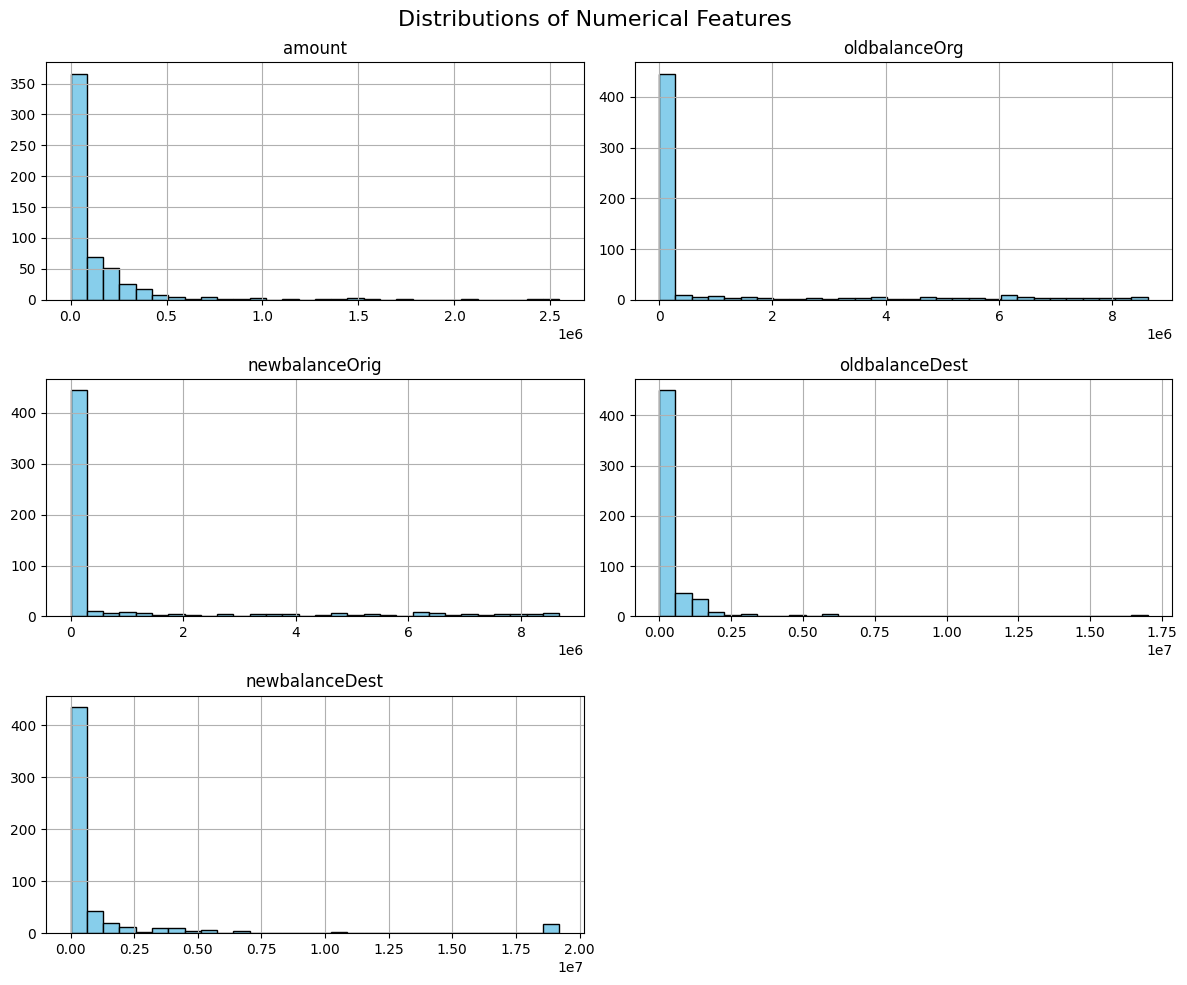

In [19]:
# Numerical Feature Distributions
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df[numerical_cols].hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

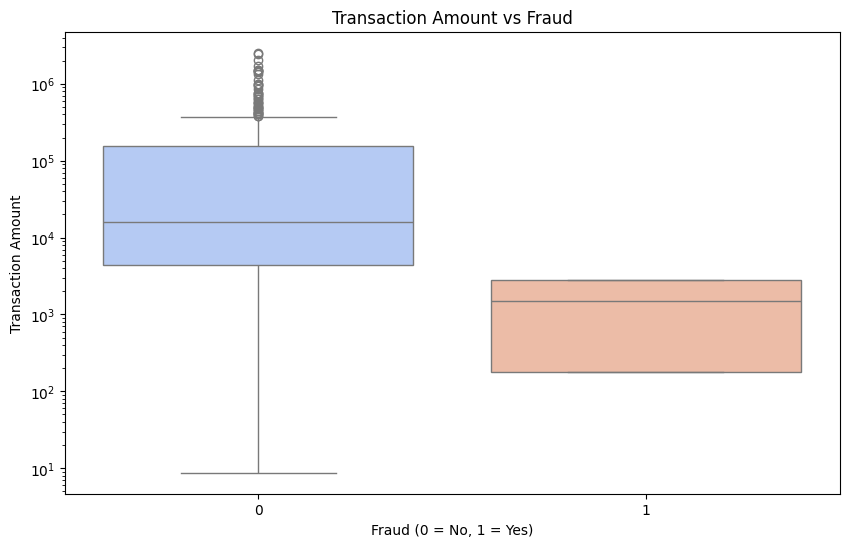

In [23]:
# Relationship Between Amount and Fraud
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='isFraud', y='amount', palette="coolwarm")
plt.title("Transaction Amount vs Fraud")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Transaction Amount")
plt.yscale("log")  # Use log scale for better visualization
plt.show()

##### Insights

* Fraudulent transactions are concentrated in lower amounts, while non-fraudulent transactions span a broader and higher range, including many outliers.

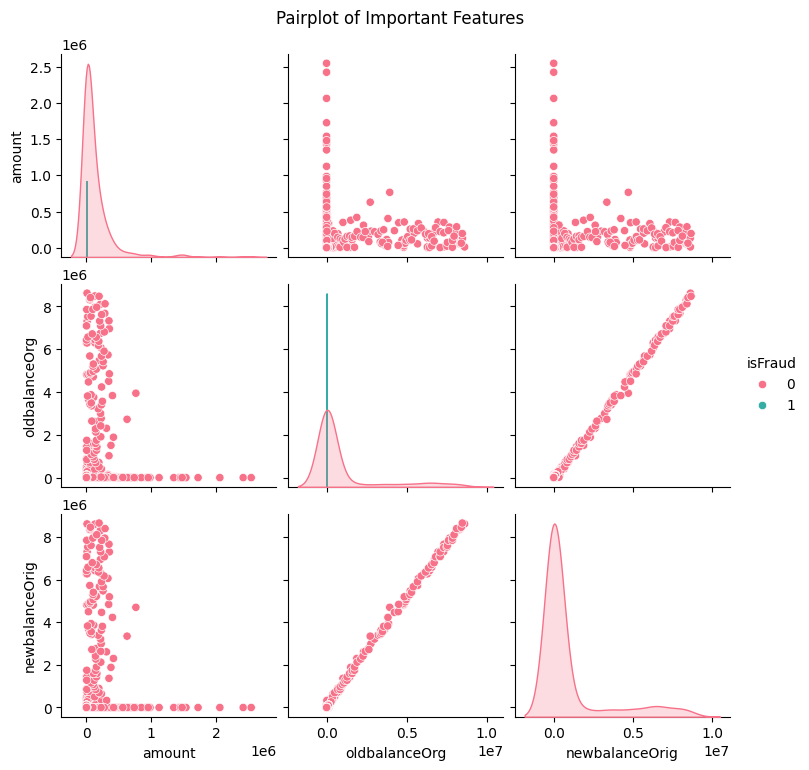

In [25]:
#Pairplot for Key Features
important_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']
sns.pairplot(df[important_features], hue='isFraud', diag_kind='kde', palette="husl")
plt.suptitle("Pairplot of Important Features", y=1.02)
plt.show()

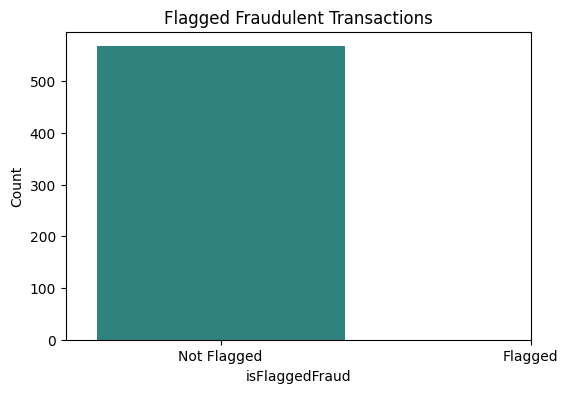

In [24]:
#Analyze Flagged Transactions
flagged_counts = df['isFlaggedFraud'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=flagged_counts.index, y=flagged_counts.values, palette="viridis")
plt.title("Flagged Fraudulent Transactions")
plt.xticks([0, 1], ["Not Flagged", "Flagged"])
plt.ylabel("Count")
plt.show()

##### Insights

* Most transactions are not marked as fraud, showing that flagged fraud cases are very few.